# <font color='red'> TUTORIAL ON FITNESS-COMPLEXITY AND ECONOMIC COMPLEXITY INDEX </font>

In [2]:
# this piece of code loads the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [4]:
DATA_PATH = '/Users/anmusso/Desktop/PhD/EFCSpringSchool/Group1/data'

________________________________________________________________________________________________________________________________

# <font color='blue'> First part: synthetic data </font>
We will analyze the Economic Complexity Index and the Fitness Complexity on some synthetic data

In [5]:
# file name
tutorial_1_filname = f'{DATA_PATH}/synthetic/mat_export_training_1.csv'

# load the file as a pandas dataframe
export_matrix = pd.read_csv(tutorial_1_filname) # header=None

# print it! matrix describing the export of an Actor on each Activity 
print(export_matrix)

   prod1  prod2  prod3  prod4  prod5  prod6  prod7  prod8
0   1400     30     10      0    310    110     80     10
1     20    120     20     20      0     90    100      0
2    320      0      0      0    200      1      0      0
3   1010      0      1     10     10      0      0      0
4    700     20      8      5    100     60     50    100
5    600     40     10      5    150     40     50     60


## Revealed Comparative Advantage (RCA)
$$ \mathbb{RCA}_{cp} = \left(\frac{E_{c,p}}{\sum_{p'} E_{c,p'}} \right) {\Large /} \left( \frac{\sum_{c'} E_{c',p}}{\sum_{c',p'} E_{c',p'}} \right)$$
"*Index used for calculating the relative advantage or disadvantage of a certain country in a certain class of goods or services as evidenced by trade flows*" (Wikipedia)

**References**
- Balassa, R., (1965), *Trade Liberalisation and "Revealed" Comparative Advantage*, The Manchester School, 33(2))

In [6]:
# matrix = np.loadtxt(open(tutorial_1_filname), delimiter=",", skiprows=1) # loading the matrix on numpy directly, not used here
matrix = export_matrix.to_numpy()
world = np.sum(matrix,0)/np.sum(matrix)
RCA = np.array([(row/sum(row))/world for row in matrix])

In [7]:
# the evaluation can be performed defining a routine, that in Python can be easily done as follows:
def rca(matrix):
    # global share
    world = np.sum(matrix,0)/np.sum(matrix)
    return np.array([(row/sum(row))/world for row in matrix])

## Binary matrix

An Actor is performing better than the global average on a given Activity if its RCA is larger than 1

In [8]:
threshold = 1
Mcp = np.array(np.where(RCA > threshold, 1, 0))
print(Mcp)

[[1 0 0 0 1 1 0 0]
 [0 1 1 1 0 1 1 0]
 [0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 1]
 [0 1 1 0 1 0 1 1]]


## Graphical representation of the matrices

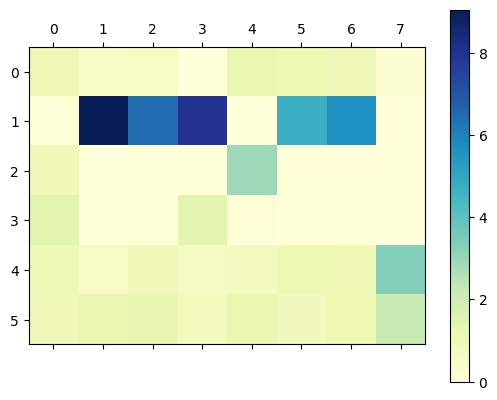

In [11]:
colormap = 'YlGnBu'
plt.matshow(RCA, cmap=colormap)
plt.colorbar()
plt.show()

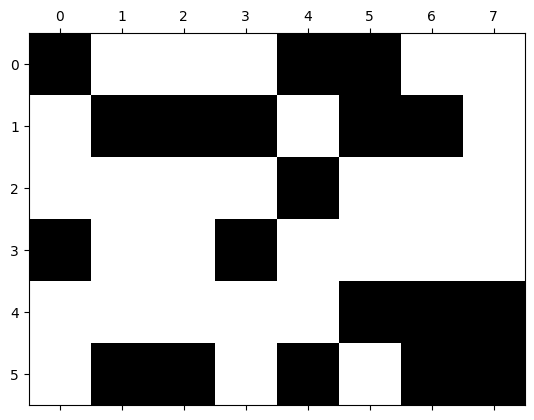

In [13]:
# the binary RCA representation
colormap = 'binary'
plt.matshow(Mcp, cmap = colormap)
plt.show()

## Ubiquity
The ubiquity of an Activity measures the number of Actors that are competitive in that Activity

In [14]:
ubiquity = np.sum(Mcp, axis = 0)
print(ubiquity)

[2 2 2 2 3 3 3 2]


In [15]:
# the order of the products with respect to their ubiquity
## np.argsort is a function returning the input array positions from smaller to larger values, while [::-1] invert the ordering from the larger to the smallest
order_products = np.argsort(ubiquity)[::-1]
print(order_products)

[6 5 4 7 3 2 1 0]


## Diversification
The diversification of an Actor measures how large is the basket of the Activities in which the Actor is competitive

In [16]:
diversification = np.sum(Mcp, axis = 1)
print(diversification)

# the order of the countries with respect to their diversification
order_countries = np.argsort(diversification)[::-1]
print(order_countries)

[3 5 1 2 3 5]
[5 1 4 0 3 2]


________________________________________________________________________________________________________________________________

# <font color='blue'> Economic Complexity Index </font>
The Economic Complexity Index is defined as the fixed point of the following iterative relations :

$$ k_{c,n}  = \frac{1}{k_{c,0}} \sum_p M_{c,p} k_{p,n-1} $$
$$ k_{p,n}  = \frac{1}{k_{p,0}} \sum_c M_{c,p} k_{c,n-1} $$

Thus, Actors are Countries and Activities are Products, aka, exported goods

**References**
- Hidalgo C. and Hausmann R., *The building blocks of economic complexity*, PNAS **26**, (2009)

In [17]:
# the routine computes and returns ECI and PCI
def Method_of_Reflections(Mcp, maximal_iterations=10):
    
    # the matrices used to project on the country and product spaces separately
    ubiquity = np.sum(Mcp, axis = 0)
    diversification = np.sum(Mcp, axis = 1)

    # initial condition (here I consider the normalized degrees of each node)
    kc = diversification / diversification.sum()
    kp = ubiquity / ubiquity.sum()

    # the transpose
    Mpc = np.transpose(Mcp)

    # loop
    kc_old = kc
    kp_old = kp
    for iteration in range(maximal_iterations):

        kc = Mcp.dot(kp_old)/diversification
        kp = Mpc.dot(kc_old)/ubiquity

        kc_old = kc
        kp_old = kp

    return kc/kc.mean(), kp/kp.mean()   


In [18]:
# compute the eci after enough iterations
kc, kp = Method_of_Reflections(Mcp,10)
print(kc)

[0.98734924 1.0111177  0.99204079 0.97544813 1.01782797 1.01621618]


### ECI and PCI scores
It is the value centralized and divided by the standard deviation

$$ (eci)_{c}  = \frac{k_{c,n}- mean(k_{c,n})}{std(k_{c,n})} $$
$$ (pci)_{c}  = \frac{k_{p,n}- mean(k_{p,n})}{std(k_{p,n})} $$

for $n$ fixed and equal to a small value (18 in the first paper of 2009)

In [19]:
def ECI_PCI_Method_of_Reflections(Mcp, maximal_iterations=10):
    kc, kp = Method_of_Reflections(Mcp,maximal_iterations)
    
    eci_score = (kc - kc.mean())/kc.std()
    pci_score = (kp - kp.mean())/kp.std()
    
    return eci_score, pci_score


In [20]:
ECI_PCI_Method_of_Reflections(Mcp,10)

(array([-0.79206913,  0.69608324, -0.49832918, -1.53720167,  1.11621573,
         1.015301  ]),
 array([-1.55338077,  0.318836  ,  0.318836  , -1.7356781 ,  1.13360636,
         0.12139733,  0.47867708,  0.9177061 ]))

### Technical issues
Iterating twice the fixed point formula, $k_c$ and $k_p$ are the right eigenvectors of the matrices:

$$ M_{c,c'} = \sum_p \frac{M_{c,p}}{k_c}\frac{M_{c',p}}{k_p} $$
$$ M_{p,p'} = \sum_c \frac{M_{c,p}}{k_p}\frac{M_{c,p'}}{k_c} $$
These matrices are stochastic matrices (every row sum to 1 and has no negative elements) and the largest eigenvalue is 1, associated to the constant vector.

Indeed, iterating the Method of Reflection we find $k_{c,n}\rightarrow 1$ and $k_{p,n}\rightarrow 1$

**References**
- Cristelli M., et al., (2013). *Measuring the Intangibles: A Metrics for the Economic Complexity of Countries and Products*, PLoS ONE, 8(8); 

- Hausmann R., Hidalgo C., et alii, The atlas of Economic Complexity, http://atlas.cid.harvard.edu/

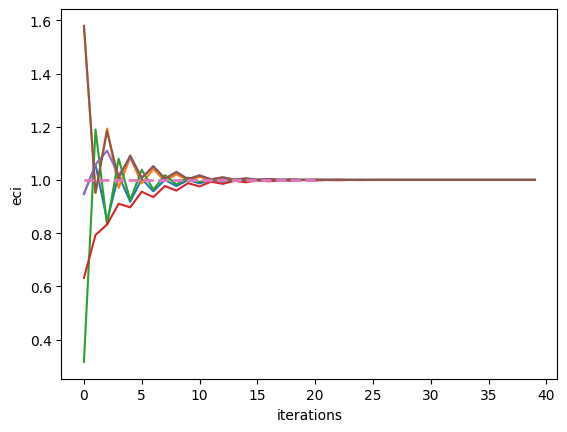

In [21]:
# compute the values of eci increasing the number of iterations
kc_series = pd.DataFrame()
for iteration in range(40):
    kc, kp = Method_of_Reflections(Mcp,iteration)
    kc_series[iteration] = kc
    
plt.plot(kc_series.transpose())
plt.plot([0,20],[1,1], lw=2, ls='--')
plt.ylabel('eci')
plt.xlabel('iterations')
plt.show()

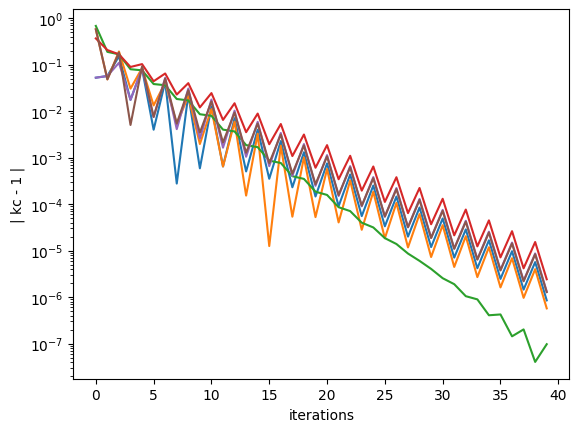

In [22]:
# in the log scale we can see the exponential convergence of the entries to their asymptote value (being 1)
plt.yscale('log')
plt.plot( np.abs(kc_series.transpose()-1))
plt.ylabel('| kc - 1 |')
plt.xlabel('iterations')
plt.show()

## Eigenvector definition
Since the first eigenvector is the constant vector, the centralization procedure *selects* from the iterative map the second eigenvector, hence ECI converges to the second vector

In [23]:
# the matrices used to project on the country and product spaces separately
Pcp = np.array(Mcp.transpose()/np.sum(Mcp,1)).transpose()
Ppc = np.array(Mcp/np.sum(Mcp,0)).transpose()

# the projections
Mcc = np.matmul(Pcp,Ppc)
Mpp = np.matmul(Ppc,Pcp)

# these are stochastic matrices
print(Mcc)

[[0.38888889 0.11111111 0.11111111 0.16666667 0.11111111 0.11111111]
 [0.06666667 0.43333333 0.         0.1        0.13333333 0.26666667]
 [0.33333333 0.         0.33333333 0.         0.         0.33333333]
 [0.25       0.25       0.         0.5        0.         0.        ]
 [0.11111111 0.22222222 0.         0.         0.38888889 0.27777778]
 [0.06666667 0.26666667 0.06666667 0.         0.16666667 0.43333333]]


In [24]:
# indeed, are stochastic matrices
print(Mcc.sum(1))
print(Mpp.sum(1))

[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
# eci eigenvector
eigvalues, eigvectors = np.linalg.eig(Mcc)
eci = np.real(eigvectors[:, eigvalues.argsort()[-2]])

# the score of the eigenvector
eci = (eci - eci.mean())/eci.std()
    
# the eigenvalue problem is invariant under a sign 
if np.corrcoef(eci,np.sum(Mcp,1))[0,1] < 0:
    eci *= -1
print(eci)

[-0.66589841  0.46409358  0.01440234 -1.82229284  1.02484962  0.98484571]


In [26]:
print(eigvalues)

[1.         0.58404584 0.46067108 0.26498009 0.05475466 0.1133261 ]


### ECI-PCI routine

In [27]:
# this routine computes the eigenvalue ECI and PCI
def ECI_PCI_eigenvalue(Mcp):
    
    # the matrices used to project on the country and product spaces separately
    vec = np.sum(Mcp,1).astype(float)
    np.divide(np.ones_like(vec), vec, out=vec, where=vec != 0)
    Pcp = np.transpose(np.transpose(Mcp)*vec)

    vec = np.sum(Mcp,0).astype(float)
    np.divide(np.ones_like(vec), vec, out=vec, where=vec != 0)
    Ppc = np.transpose(Mcp*vec)

    # the projections
    Mcc = np.matmul(Pcp,Ppc)
    Mpp = np.matmul(Ppc,Pcp)
    
    # eci eigenvector
    eigvalues, eigvectors = np.linalg.eig(Mcc)
    eci = np.real(eigvectors[:, eigvalues.argsort()[-2]])

    # the score of the eigenvector
    eci = (eci - eci.mean())/eci.std()
    
    if np.corrcoef(eci,np.sum(Mcp,1))[0,1] < 0:
        eci *= -1

    eigvalues, eigvectors = np.linalg.eig(Mpp)
    pci = np.real(eigvectors[:, eigvalues.argsort()[-2]])

    # the score of the eigenvector
    pci = (pci - pci.mean())/pci.std()
    
        
    if np.corrcoef(pci,np.sum(Mcp,0))[0,1] < 0:
        pci *= -1
        
    return eci, pci

## Remarks about ECI:

1) the algorithm is linear, thus it has easy mathematical statements and the proof of convergence and is simple to handle

2) the second eigenvector is an approximation of the graph cut, hence the best way to separate the graph into two parts with comparable weight (number of edges) and reducing the number of inter-cluster edges 

**References**
- Mealy P., et al., *Interpreting economic complexity*, Science Advances (2019), 5(1)

## A few concepual issues on ECI:

**References**
- Pietronero L., et al., *Economic Complexity:" Buttarla in caciara" vs a constructive approach.*, https://arxiv.org/abs/1709.05272

1) Averaging: given a (PCI) the Actor's ECI is an average of PCIs on the Actor's basket, thus Actors producing low complexity Activities are lowered independently on their ability to produce high complexity Activities. Considering an ordered binary matrix (below) ranked by product complexity, it is possible to obtain that Country B is *better ranked* than A

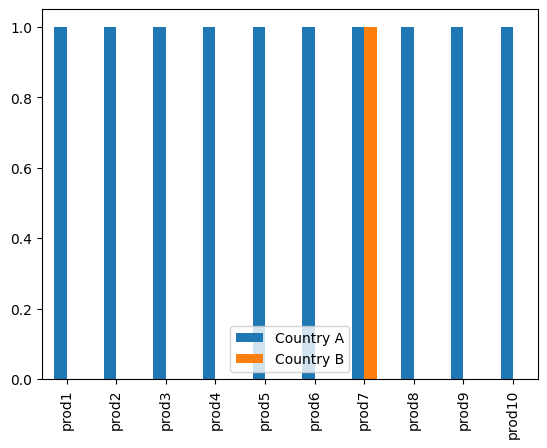

In [29]:
avg_mat = pd.read_csv(f'{DATA_PATH}/synthetic/mat_eci_avg.csv').transpose()
avg_mat.columns = ['Country A','Country B']
avg_mat.plot.bar()
plt.show()

2) Linearity: using the ECI algorithm, the complexity of the product is driven by the countries with the larger index, thus raw materials get high complexity only because competitive countries have them 

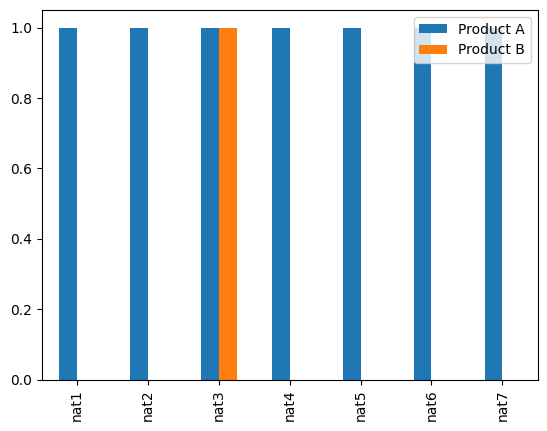

In [31]:
lin_mat = pd.read_csv(f'{DATA_PATH}/synthetic/mat_eci_lin.csv').transpose()
lin_mat.columns = ['Product A','Product B']
lin_mat.plot.bar()
plt.show()

________________________________________________________________________________________________________________________________

# <font color='blue'>  Fitness & Complexity </font>

**References**
- A. Tacchella, et alii, *A new metrics for countries' Fitness and products Complexity*, Scientific Reports **2**, 723 (2012) 

- https://efc-school.cref.it/references


## Fitness
Given the complexity of the Activities, the fitness of an Actor gets most of the contribution from the Activities with high complexity.
In formula it can be seen with this simple linear relation
$$\tilde{F}_c=\sum_{p} M_{cp} Q_p,\qquad F_c = \frac{\tilde{F}_c}{\sum_c\tilde{F}_c}$$

In [32]:
# here an arbitrary value of the complexity
complexity = np.array(ubiquity/ubiquity.sum())
print(complexity)

[0.10526316 0.10526316 0.10526316 0.10526316 0.15789474 0.15789474
 0.15789474 0.10526316]


In [33]:
fitness = Mcp.dot(complexity)
fitness /= fitness.sum()
print(fitness)

[0.17021277 0.25531915 0.06382979 0.08510638 0.17021277 0.25531915]


## Complexity
However, given the fitness of the Actors, the complexity of an Activity gets most of the contribution from the fitness of the Actors with *lower* fitness that produce it.
In formula it can be translated as being inversely proportional to the sum of the inverse of the fitness of the Actors that produce such an Activity
$$\tilde{Q}_p = \left( \sum_c M_{cp} \frac{1}{F_c} \right)^{-1},\qquad Q_c = \frac{\tilde{Q}_c}{\sum_c\tilde{Q}_c}$$

In [34]:
Mpc = np.transpose(Mcp)
inverse_fitness = 1/fitness
complexity = Mpc.dot(inverse_fitness)
complexity = 1/complexity
complexity /= complexity.sum()
print(complexity)

[0.08674515 0.19517659 0.19517659 0.09758829 0.06005433 0.09758829
 0.11152948 0.15614127]


## Fixed point algorithm
Fitness and Complexity are self-consistent quantities with their non-linear relations.
The algorithm finds iteratively the fitness and the complexity
$$\tilde{F}_c=\sum_{p} M_{cp} Q^{n-1}_p,\qquad  \tilde{Q}_p = \left( \sum_c M_{cp} \frac{1}{F^{n-1}_c} \right)^{-1}$$
$$F^n_c = \frac{\tilde{F}_c}{\sum_c\tilde{F}_c},\qquad  Q^n_c = \frac{\tilde{Q}_c}{\sum_c\tilde{Q}_c}$$

In [35]:
# the iterative FC routine returning fitness and complexity
def fitness_complexity_algorithm(Mcp, maximal_iterations = 100):

    # initial condition (here I consider the degrees of each node)
    fitness = np.array(np.sum(Mcp, axis = 1)/np.sum(Mcp))

    #complexity = np.nan_to_num(1./np.array(np.sum(Mcp, axis = 0)))
    complexity = np.array(np.sum(Mcp, axis = 0)).astype(np.float64)
    one_fit = np.ones_like(fitness)
    one_com = np.ones_like(complexity)
    np.divide(one_com, complexity, out=complexity, where=complexity != 0)
    
    complexity /= complexity.sum()
    Mpc = np.transpose(Mcp)
    inverse_fitness = np.zeros_like(fitness)

    # loop over the iterations
    for iteration in range(maximal_iterations):

        # compute the inverse fitness
        np.divide(one_fit, fitness, out=inverse_fitness, where=fitness != 0)
        
        # update the fitness
        fitness = Mcp.dot(complexity)
        fitness /= fitness.sum()
        
        # update the complexity
        complexity = Mpc.dot(inverse_fitness)
        np.divide(one_com, complexity, out=complexity, where=complexity != 0)
        complexity /= complexity.sum()

    return fitness/fitness.mean(),complexity/complexity.mean()

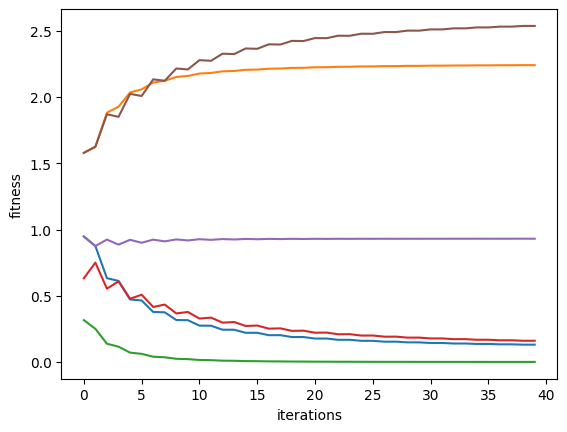

In [36]:
# show the result of the first iterations (it does not converge to a single constant)
fit_series = pd.DataFrame()
for iteration in range(40):
    fitness, complexity = fitness_complexity_algorithm(Mcp,iteration)
    fit_series[iteration] = fitness
    
plt.plot(fit_series.transpose())
plt.ylabel('fitness')
plt.xlabel('iterations')
plt.show()

In [37]:
# show the fitness and the complexity at convergence
fitness, complexity = fitness_complexity_algorithm(Mcp,1000)
print(fitness)

[1.10995162e-01 2.24707334e+00 3.89291455e-75 1.32570135e-01
 9.30974837e-01 2.57838653e+00]


## An important issue: the presence of a **MONOPOLY**
Convergence of the F&C algorithm on a generic matrix is not assured. Often there are entries with a vanishing Fitness, raising problems on the evaluation of complexity and more in general on the convergence.
However, the rankings' convergence is still meaningful. 

This issue, that at a first sight could be seen as a drawback, is often explainable in terms of the presence of monopolies (or a couple of duopoles). In fact, FC cannot handle monopoles by construction.

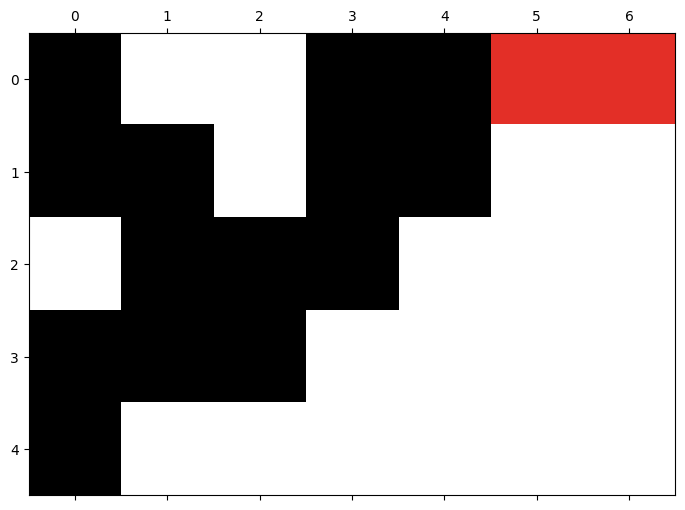

In [39]:
Mcp_mono = pd.read_csv(f'{DATA_PATH}/synthetic/mat_monopole_example.csv')
colormap = 'binary'
fig, ax = plt.subplots(figsize=(9,6))
# show the matrix
ax.matshow(Mcp_mono, cmap = colormap)

# highlight the monopoles
Mcp_mono2 = np.zeros(Mcp_mono.shape)
Mcp_mono2[:,:] = np.nan # such that are not printed
Mcp_mono2[0,-1] = 1
Mcp_mono2[0,-2] = 1
ax.matshow(Mcp_mono2, cmap = 'Reds', vmin=0, vmax=1.5, alpha=1)

plt.show()

In [40]:
fits = pd.DataFrame(columns = np.geomspace(1,1000,10).astype(int))
for iterations in np.geomspace(1,1000,10).astype(int):
    fit, com = fitness_complexity_algorithm(Mcp_mono.to_numpy(), maximal_iterations = iterations)
    fits[iterations] = fit

In [41]:
fits

,1,2,4,10,21,46,100,215,464,1000
0,2.202381,2.624037,3.391851,4.505885,4.943240,4.999619e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
1,1.011905,0.961270,0.733460,0.281079,0.037080,2.600524e-04,4.594107e-09,3.392042e-19,4.107643e-41,2.637152e-88
2,0.833333,0.721820,0.490056,0.135804,0.013451,8.442717e-05,1.485244e-09,1.096623e-19,1.327971e-41,8.525724e-89
3,0.773810,0.588216,0.342739,0.073583,0.006164,3.664562e-05,6.434559e-10,4.750921e-20,5.753197e-42,3.693617e-89
4,0.178571,0.104656,0.041894,0.003648,0.000065,1.075571e-08,8.002741e-17,3.906093e-34,1.305507e-71,2.752583e-152


## References to further developments of the FC algorithm 
* The maximal number of iteration can be selected "on the run" depending on how stable is the ordering of the fitness and complexities (Pugliese E., et al., *On the convergence of the Fitness-Complexity algorithm*, L. Eur. Phys. J. Spec. Top. (2016) 225: 1893). 

* Explanation of FC from an optimal approach (Mazzilli D., et al., *Fitness in the light of Sinkhorn*, arxiv preprint, arXiv:2212.12356)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

## Correlation ECI with FC

In [42]:
eci, pci = ECI_PCI_eigenvalue(Mcp)

In [43]:
# Pearson correlation between fitness and eci in this simple model
np.corrcoef(fitness,eci)[0,1]

0.6710300144700914

In [44]:
np.corrcoef(complexity,pci)[0,1]

0.6703209494270146

------------------------------------------------------------------------------------------------------------------------

# <font color='blue'>  Nestedness </font>

The **nestedness** indicates a property of the network that the nodes connectance is hierarchically distributed, where poorly-connected nodes are a sub-sample of the more connected ones.

It can be visualized by reordering the adjacency matrix with respect to a suitable sorting, displaying a **triangular shape**. A first approximation of the arrangement is given by the ubiquity and diversification ranking

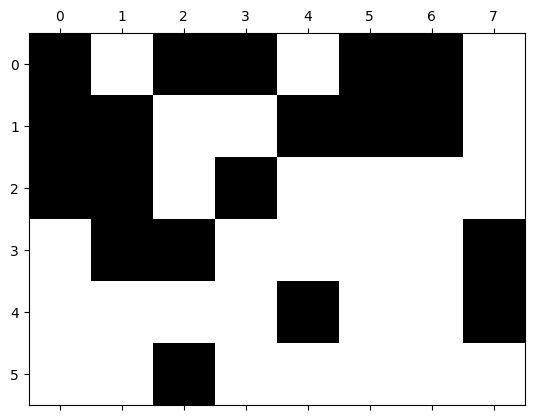

In [45]:
ordered_Mcp = np.zeros(np.shape(Mcp))

for c in range(len(order_countries)):
    for p in range(len(order_products)):
        ordered_Mcp[c,p] = Mcp[order_countries[c],order_products[p]]

colormap = 'binary'
plt.matshow(ordered_Mcp, cmap = colormap)
plt.show()

In [46]:
# routine generating a new matrix ordered (this can be done in simpler ways)
def matrix_ordering(matrix, order_row, order_columns):
    # create a new matrix
    ordered_matrix = np.zeros(np.shape(matrix))
    
    # the loops can be slow in pythons. References to the appropriate python libraries are usually faster
    for c in range(len(order_row)):
        for p in range(len(order_columns)):
            ordered_matrix[c,p] = matrix[order_row[c],order_columns[p]]

    return ordered_matrix


## Reordering of the binary matrix with respect to the eci and pci orders

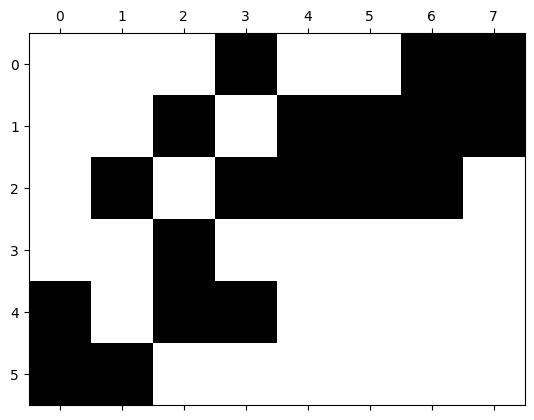

In [47]:
# showing the matrix
ordered_matrix = matrix_ordering(Mcp,np.argsort(eci)[::-1],np.argsort(pci))
plt.matshow(ordered_matrix, cmap = colormap)
plt.show()

## Reordering of the binary matrix with respect to the fitness and complexity orders

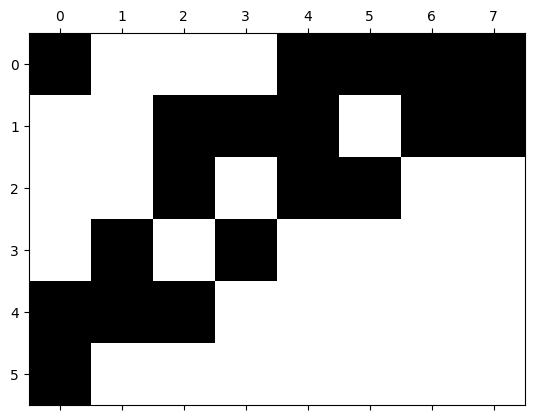

In [48]:
# why we don't need to wite [::-1] for the complexity?
ordered_matrix = matrix_ordering(Mcp,np.argsort(fitness)[::-1],np.argsort(complexity))
plt.matshow(ordered_matrix, cmap = colormap)
plt.show()

________________________________________________________________________________________________________________________________

# <font color='blue'> Real data: exports </font>
The export data derives from COMTRADE following the SITC rev.2 classification from 1990 to 2021 and aggregated at the group level (186 code and 3 digits). The GDP per capita data is downloaded from the World Bank WDI database and is in the range 1990 to 2021.
We create a python **dictionary** where each year is associated to the relative bipartite network linking exporter with products.


In [53]:
GDP_pc = pd.read_csv(f'{DATA_PATH}/economic/gdp_pc_wb.csv', index_col=0, skiprows=1, names=range(1990,2022))

In [54]:
export = {}
for year in range(1990, 2022):
    export[year] = pd.read_csv(f'{DATA_PATH}/export/export_sitc_rev2_{year}.csv', index_col=0)

We use the RCA binarization and we create the set of binary matrices, again in a python dictionary

In [55]:
binary_rca = {}
for year in range(1990,2022):
    mat = export[year].copy()
    rcamat = ((mat/mat.sum(0)).transpose()/mat.sum(1)*mat.sum().sum()).transpose().fillna(0)
    binary_rca[year] = (rcamat>=1).astype(int)

## Economic Complexity metrics

In [56]:
# create empty variables storing the diversification and the ubiquity, using the pandas DataFrames
diversification = pd.DataFrame(columns=range(1990,2022), index=binary_rca[1990].index)
ubiquity = pd.DataFrame(columns=range(1990,2022), index=binary_rca[1990].columns)

# loop over the years
for year in range(1990,2022):
    mat = binary_rca[year]
    diversification[year] = pd.Series(mat.sum(1), index=mat.index)
    ubiquity[year] = pd.Series(mat.sum(0), index=mat.columns)
    

In [57]:
# loop over the time series
fitness = pd.DataFrame(columns=range(1990,2022), index=binary_rca[1990].index)
complexity = pd.DataFrame(columns=range(1990,2022), index=binary_rca[1990].columns)

for year in range(1990,2022):
    mat = binary_rca[year].copy()

    fit, com = fitness_complexity_algorithm(mat.to_numpy(), maximal_iterations = 200)
    
    fitness[year] = pd.Series(fit, index=mat.index)
    complexity[year] = pd.Series(com, index=mat.columns)
    

In [58]:
# loop over the time series
eci = pd.DataFrame(columns=range(1990,2022), index=binary_rca[1990].index)
pci = pd.DataFrame(columns=range(1990,2022), index=binary_rca[1990].columns)

for year in range(1990,2022):
    mat = binary_rca[year].copy()

    eci_score, pci_score = ECI_PCI_eigenvalue(mat.to_numpy())
    
    eci[year] = pd.Series(eci_score, index=mat.index)
    pci[year] = pd.Series(pci_score, index=mat.columns)


## Trajectories
For the sake of simplicity we focus on a subset of countries.

In [59]:
subset_countries = ['AUS','NZL','AUT','NOR','BEL','POL','CAN','PRT','CHL','SVK','CZE','SVN','DNK','ESP','EST','SWE','FIN','CHE','FRA','TUR','DEU','GBR','GRC','USA','HUN','ISL','IRL','ARG','ISR','BRA','ITA','CHN','JPN','IND','KOR','IDN','LUX','RUS','MEX','SAU','NLD','ZAF']

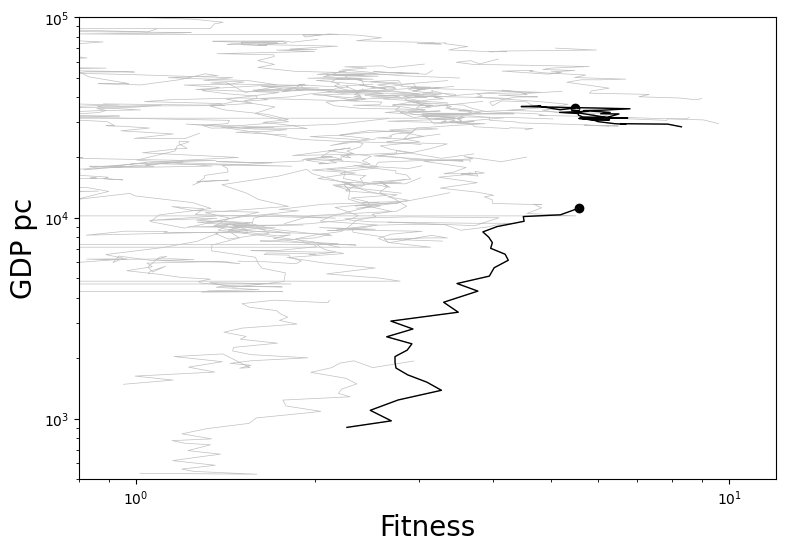

In [60]:
set1 = fitness
set2 = GDP_pc
list_idx = subset_countries

fig, ax = plt.subplots(figsize=(9,6))
ax.set(xscale='log',yscale='log')
ax.set_xlim(8e-1,1.2e1)
ax.set_ylim(5e2,1e5)

plt.xlabel('Fitness', size=20, x=0.5)
plt.ylabel('GDP pc', size=20, y=0.5)

#ax.scatter(set1,set2)
for idx in list_idx:
    ax.plot(set1.loc[idx],set2.loc[idx], color='silver', lw=0.5)

for idx in ['CHN','JPN']:
    ax.plot(set1.loc[idx],set2.loc[idx], color='black', lw=1)
    ax.scatter(set1.loc[idx,2021],set2.loc[idx,2021], color='black')


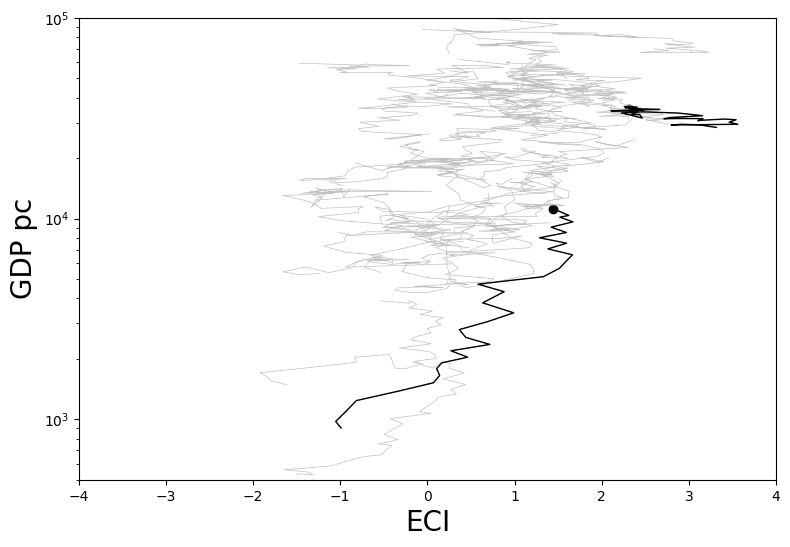

In [61]:
set1 = eci
set2 = GDP_pc
list_idx = subset_countries

fig, ax = plt.subplots(figsize=(9,6))
ax.set(xscale='linear',yscale='log')
ax.set_xlim(-4e0,4e0)
ax.set_ylim(5e2,1e5)

plt.xlabel('ECI', size=20, x=0.5)
plt.ylabel('GDP pc', size=20, y=0.5)

#ax.scatter(set1,set2)
for idx in list_idx:
    ax.plot(set1.loc[idx],set2.loc[idx], color='silver', lw=0.5)

for idx in ['CHN','JPN']:
    ax.plot(set1.loc[idx],set2.loc[idx], color='black', lw=1)
    ax.scatter(set1.loc[idx,2021],set2.loc[idx,2021], color='black')


## Nested or not nested?
The triangularity of the matrix can be easily checked using the ranking from different measures of economic complexity

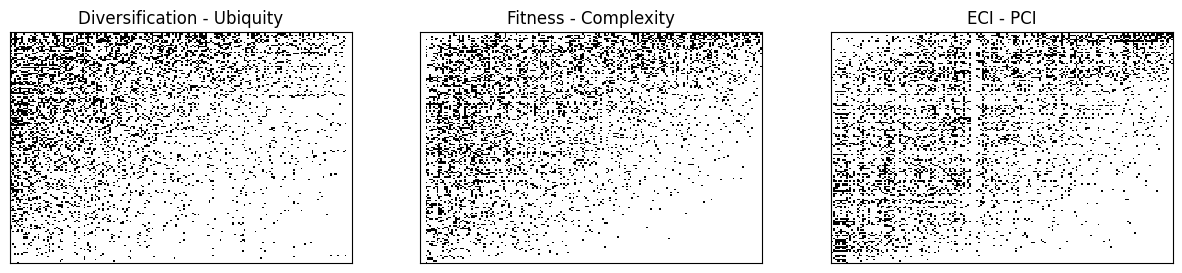

In [62]:
fig, ax = plt.subplots(figsize=(15,3), ncols=3)

year = 2000
set1 = binary_rca[year].sum(1).to_numpy()
set2 = binary_rca[year].sum(0).to_numpy()
matrix = binary_rca[year].iloc[np.argsort(set1)[::-1],np.argsort(set2)[::-1]]
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax[0].matshow(matrix, aspect='auto', cmap='binary')
ax[0].set_title('Diversification - Ubiquity')
ax[0].set_xticks([])
ax[0].set_xticks([], minor=True)

set1 = fitness[year].to_numpy()
set2 = complexity[year].to_numpy()
matrix = binary_rca[year].loc[fitness.index,complexity.index].iloc[np.argsort(set1)[::-1],np.argsort(set2)[::]]
ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax[1].matshow(matrix, aspect='auto', cmap='binary')
ax[1].set_title('Fitness - Complexity')
ax[1].set_xticks([])
ax[1].set_xticks([], minor=True)

set1 = eci[year].to_numpy()
set2 = pci[year].to_numpy()
matrix = binary_rca[year].loc[eci.index,pci.index].iloc[np.argsort(set1)[::-1],np.argsort(set2)[::-1]]
ax[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax[2].matshow(matrix, aspect='auto', cmap='binary')
ax[2].set_title('ECI - PCI')
ax[2].set_xticks([])
ax[2].set_xticks([], minor=True)

plt.show()

## ECI clusters
ECI is considered to be related to a clustering technique (Ncut as discussed by Mealy, 2019), albeit only the eigenvalue and not its centralized score, so it can be visualized via a map (in our case of the world as we consider countries) where countries are colored according to their clusters of belonging.

In principle, the correct way to separate the two sets of countries is to consider a threshold for which the two partitions have lower connectance. However, this is evaluated by verifying numerically where the splitting point is, which is a technicality not important here. 
In the original work (Shi 2000) the authors also propose to consider the splitting of the eigenvector in 0.

However, other clustering techniques can be applied as well, since spectral clustering is not suitable when you don't know a priori the number of communities present in the system. Instead, there are other approaches based on the Modularity, Label Propagation and Node Similarity. 

**References**
- Shi J. and Malik J., *Normalized Cuts and Image Segmentation*, IEEE TRANSACTIONS ON PATTERN ANALYSIS AND MACHINE INTELLIGENCE, (2000) 22(8)

In [63]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 2.6 MB/s eta 0:00:0000:0100:01m
  Using cached shapely-2.0.1-cp38-cp38-macosx_10_9_x86_64.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 8.1 MB/s eta 0:00:00
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


In [64]:
#import geopandas, which is a dataframe representation of 'shapefiles', files with geographical boundaries
import geopandas as gpd

# import the world map, part of geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# change the label of France and Norway, that are not standard in the world GeoDataFrame (I don't know why...)
for idx in world.index:
    if world.loc[idx,'name'] == 'France':
        world.loc[idx,'iso_a3'] = 'FRA'
    elif world.loc[idx,'name'] == 'Norway':
        world.loc[idx,'iso_a3'] = 'NOR'
world = world.set_index('iso_a3')

/var/folders/wl/scrxrk691rqdbry02_kt05pm0000gq/T/ipykernel_15204/3698580020.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [69]:
# do you like 2000?
year = 2000

#get the eigenvalue (not the score), copying the code from the routine above
Mcp = binary_rca[year].copy().to_numpy()

# the matrices used to project on the country and product spaces separately
vec = np.sum(Mcp,1).astype(float)
np.divide(np.ones_like(vec), vec, out=vec, where=vec != 0)
Pcp = np.transpose(np.transpose(Mcp)*vec)
vec = np.sum(Mcp,0).astype(float)
np.divide(np.ones_like(vec), vec, out=vec, where=vec != 0)
Ppc = np.transpose(Mcp*vec)

# the projections
Mcc = np.matmul(Pcp,Ppc)
    
# eci eigenvector
eigvalues, eigvectors = np.linalg.eig(Mcc)
eci_vec = np.real(eigvectors[:, eigvalues.argsort()[-2]])

# store in a dataframe
eci_vec = pd.DataFrame(eci_vec, index=binary_rca[year].index, columns=['eci'])

In [70]:
# build the cathegorical variable for the two partitions, one with entry 0 and the other with entry 1
eci_vec['cluster'] = (eci_vec['eci']>=0).astype(int)
#eci_vec

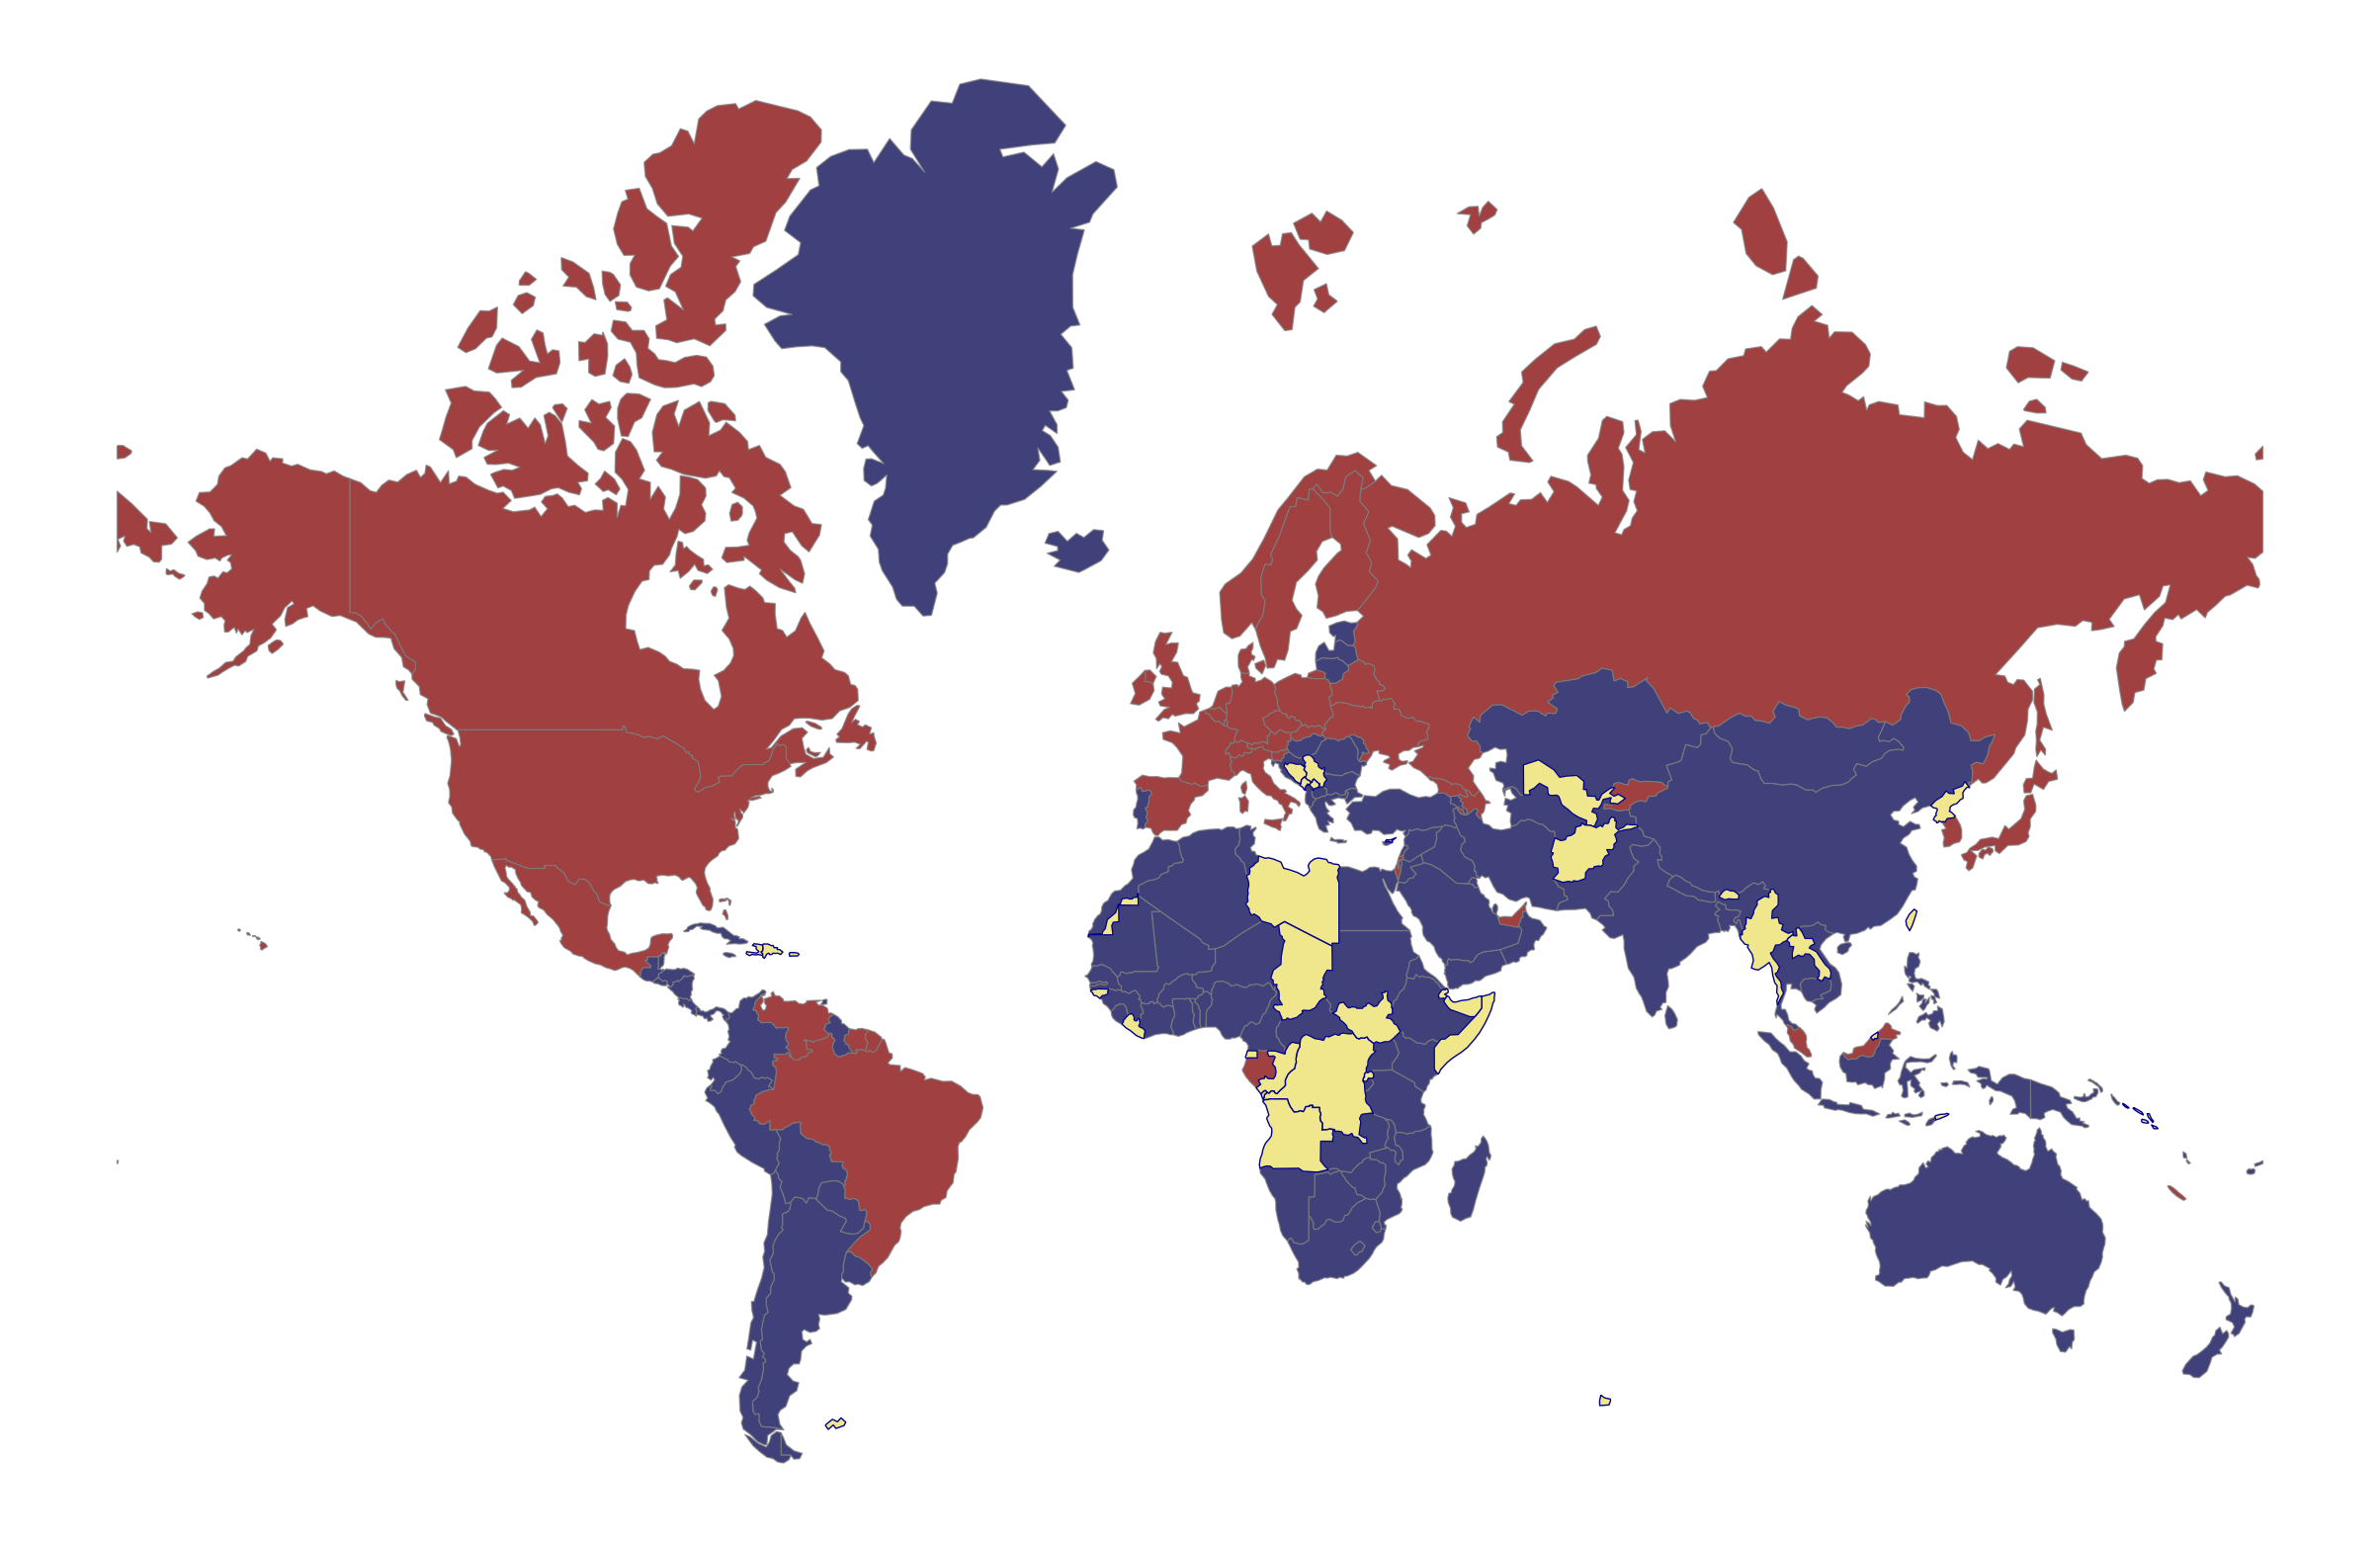

In [71]:
# define in the GeoDF a feature that will define the color of the regions
world['feature'] = eci_vec['cluster']

# create the plot
fig = plt.figure(figsize=(40,20))
ax = fig.add_subplot(1,1,1)

# ATA is anctartica, removed from the map since it is useless for our analysis
# color scale is such that the two clustes are in red and blue, while in yellow there are the missing countries in the database (the feature is not defined there on our dataset)
world[world.index!= 'ATA'].to_crs("EPSG:3395").plot(column='feature', 
           ax=ax, edgecolor='gray', cmap='seismic', alpha=0.75, vmin=0, vmax=1,
           missing_kwds={"color": "khaki","edgecolor": "darkblue", 'alpha':1})

# remove the axes
plt.axis('off')
plt.show()


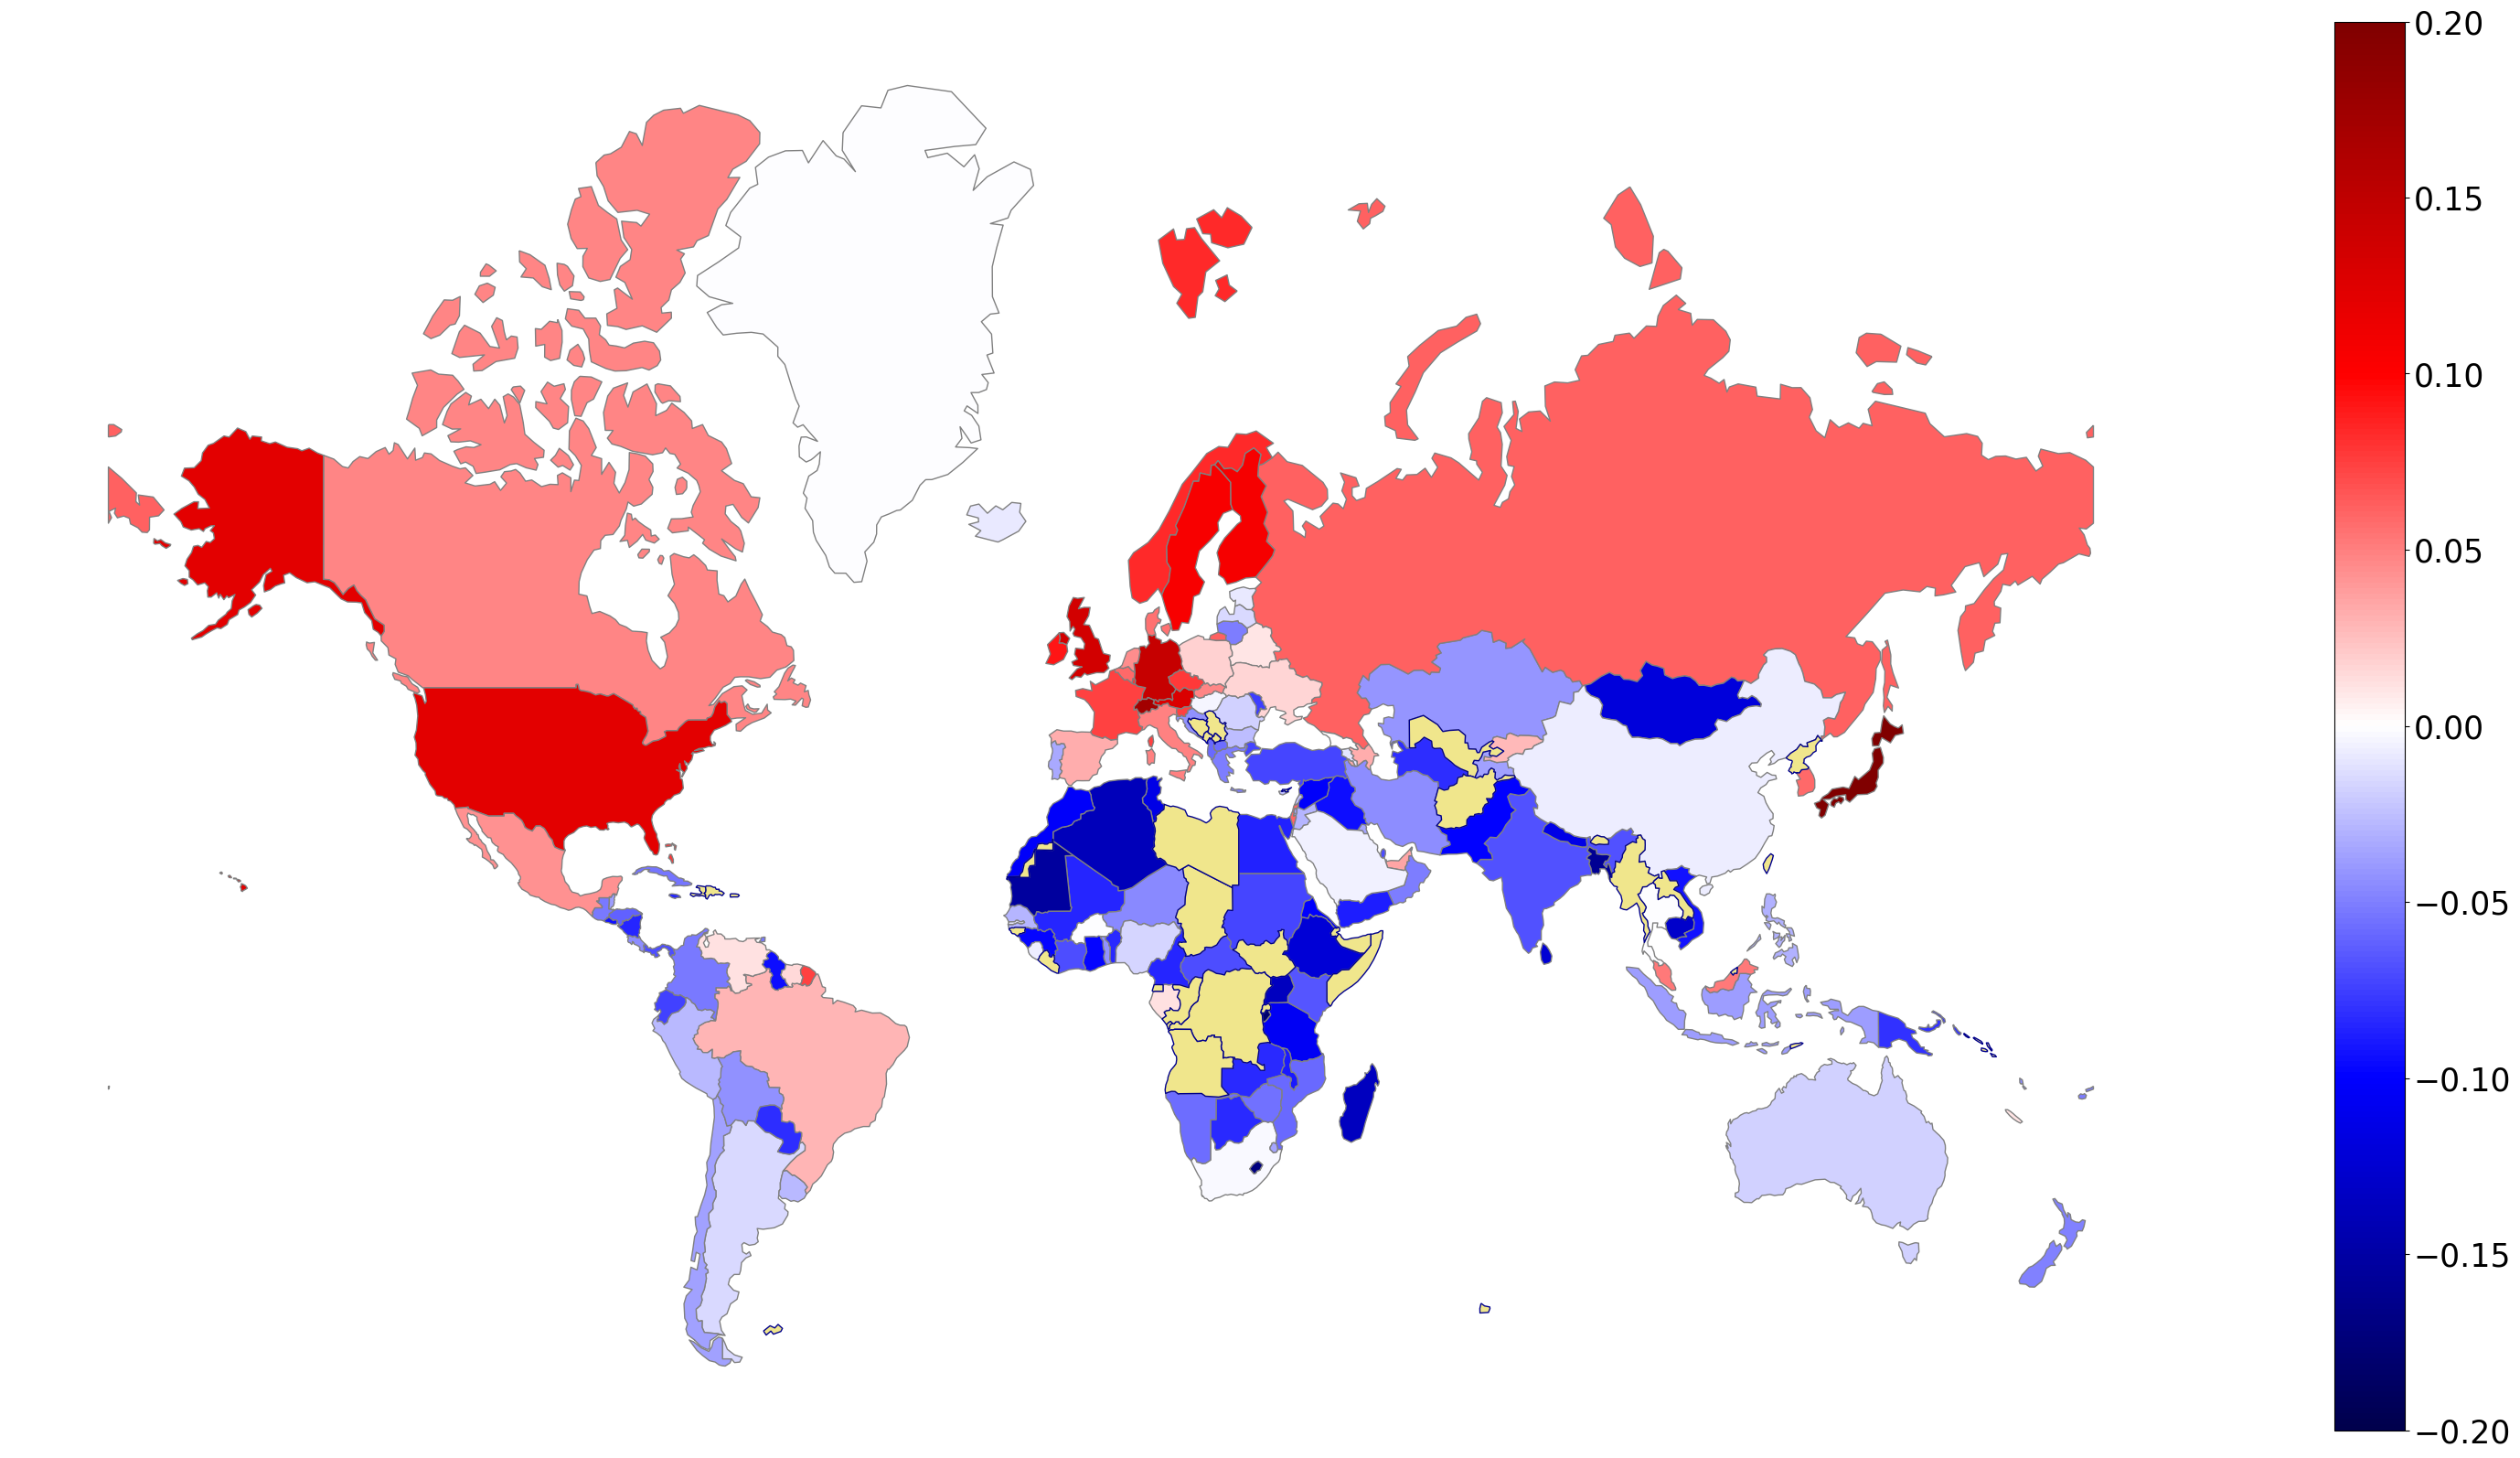

In [72]:
# instead, if we consider the vector ECI, we have
world['feature'] = eci_vec['eci']

# create the plot
fig = plt.figure(figsize=(40,20))
ax = fig.add_subplot(1,1,1)

# ATA is anctartica, removed from the map since it is useless in our analysis
# color scale is such that the two clustes are in red and blue, while in yellow there are the missing countries in the database (the feature is not defined there on our dataset)
world[world.index!= 'ATA'].to_crs("EPSG:3395").plot(column='feature', 
           ax=ax, edgecolor='gray', cmap='seismic', alpha=1, vmin=-0.2, vmax=0.2,
           missing_kwds={"color": "khaki","edgecolor": "darkblue", 'alpha':1}, legend = True)


# for the colorbar
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=25)

# remove the axes
plt.axis('off')
plt.show()


------------------------------------------------------------------------------------------------

# <font color='blue'> Exercises: </font>
* Compute Fitness and Complexity on the technological database. The data is stored in the folder *technology/countries_selected* with a name '*{}-mat_ah.csv*'.format(year)

* Compute the Exogeneous Fitness (general reference are Operti et al, 2018, and Sbardella et al, 2018, from the references on the school web page https://efc-school.cref.it/references) on the regional patent data at NUTS2 level. The data is stored in the folder *technology/regions* with a name '*{}-mat_ah.csv*'.format(year)

In [77]:
df = pd.read_csv('/Users/anmusso/Downloads/synop.202306.csv', sep=';', header=0, index_col=0)

In [80]:
df.head()

,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
numer_sta,,,,,,,,,,,,,,,,,,,,,
7005,20230601000000,102240,40,1,30,3.800000,285.950000,284.550000,91,7310,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7015,20230601000000,102260,70,1,360,4.700000,286.250000,284.650000,90,7240,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7020,20230601000000,102320,70,1,70,11.400000,285.850000,283.950000,88,12000,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7027,20230601000000,102190,50,1,20,3.100000,286.250000,284.950000,92,6820,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7037,20230601000000,102080,0,0,30,6.200000,286.250000,284.350000,88,12250,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [84]:
a = df.loc[7005]

In [85]:
a

,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
numer_sta,,,,,,,,,,,,,,,,,,,,,
7005,20230601000000,102240,40,1,30,3.800000,285.950000,284.550000,91,7310,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230601030000,102230,-10,8,30,4.200000,285.650000,284.250000,91,6370,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230601060000,102270,40,3,40,5.300000,285.650000,283.850000,89,10230,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230601090000,102260,0,0,30,4.900000,289.450000,285.450000,77,16170,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230601120000,102200,-50,8,20,5.400000,292.250000,286.850000,71,18060,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230601150000,102120,-80,7,20,6.600000,292.550000,285.350000,63,20000,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230601180000,102090,-40,6,30,6.800000,288.850000,282.550000,66,20000,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230601210000,102230,120,2,30,4.700000,284.550000,281.250000,80,20000,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7005,20230602000000,102250,20,3,30,6.200000,284.050000,280.350000,78,20000,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [86]:
a.columns

Index(['date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'vv',
       'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch', 'pres',
       'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol',
       'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige', 'ssfrai',
       'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1',
       'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1',
       'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3',
       'nnuage4', 'ctype4', 'hnuage4', 'Unnamed: 59'],
      dtype='object')